In [1]:
import os
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from hn2016_falwa.plot_utils import compare_two_fields_on_map

clare_data_dir_path = f"{os.getenv('HOME')}/Dropbox/GitHub/hn2016_falwa/github_data_storage/"
before_fix_file = xr.open_dataset(f'{clare_data_dir_path}2022-01-before-ua2-fix.nc', decode_times=False)
after_fix_file = xr.open_dataset(f'{clare_data_dir_path}2022-01-after-ua2-fix.nc', decode_times=False)


In [2]:
tstamps = [datetime.datetime(2022,1,1,0,0) + datetime.timedelta(hours=6)*i for i in range(124)]

In [3]:
before_fix_file

<xarray.Dataset>
Dimensions:    (latitude: 91, longitude: 360, time: 128)
Coordinates:
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time       (time) int64 -9223372036854775806 ... -9223372036854775806
Data variables:
    lwa        (time, latitude, longitude) float32 ...
    ua1        (time, latitude, longitude) float32 ...
    ua2        (time, latitude, longitude) float32 ...
    ep1        (time, latitude, longitude) float32 ...
    ep2        (time, latitude, longitude) float32 ...
    ep3        (time, latitude, longitude) float32 ...
    ep4        (time, latitude, longitude) float32 ...

cmin = 69.31427764892578, cmax = 2891.007080078125


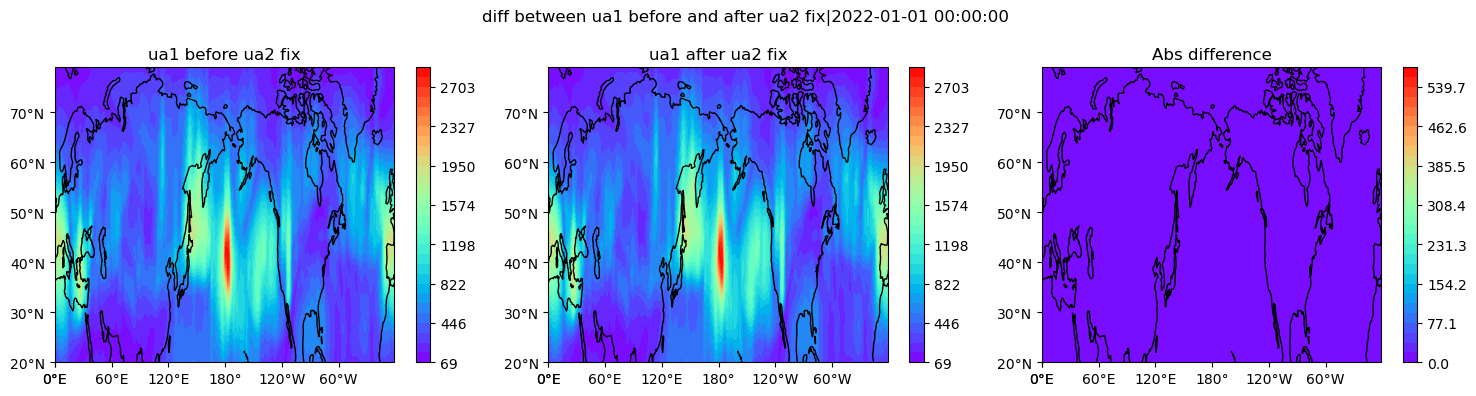

In [4]:
# Initial estimation of difference
tstep = 0

xlon = np.arange(0, 360)
ylat = np.arange(0, 91)

field_a = before_fix_file.isel(time=tstep)['ua1'].values[20:80, :]
field_b = after_fix_file.isel(time=tstep)['ua1'].values[20:80, :]
compare_two_fields_on_map(
    field_a=field_a,
    field_b=field_b,
    a_title='ua1 before ua2 fix', 
    b_title='ua1 after ua2 fix',
    x_coord=xlon, 
    y_coord=ylat[20:80],
    title=f'diff between ua1 before and after ua2 fix|{tstamps[tstep]}',
    diff_factor=0.2)

In [5]:
def plot_on_map(xlon, ylat, field, title):
    fig = plt.figure(figsize=(12, 3))
    ax5 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(180))
    plt.ylim(20, 80)
    plt.xlim(0, 360)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    ax5.set_extent([0, 360, 20, 80], ccrs.PlateCarree())
    ax5.coastlines(color='black', alpha=1)
    ax5.set_aspect('auto')
    ax5.set_xticks([60*i for i in range(7)], crs=ccrs.PlateCarree())
    ax5.set_yticks([20, 30, 40, 50, 60, 70, 80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax5.xaxis.set_major_formatter(lon_formatter)
    ax5.yaxis.set_major_formatter(lat_formatter)
    ott = ax5.contourf(xlon, ylat, field, 20, transform=ccrs.PlateCarree(), cmap='rainbow')
    ax5.set_title(title)
    fig.colorbar(ott, ax=ax5, label='ua2 (m/s**2)')
    plt.show()

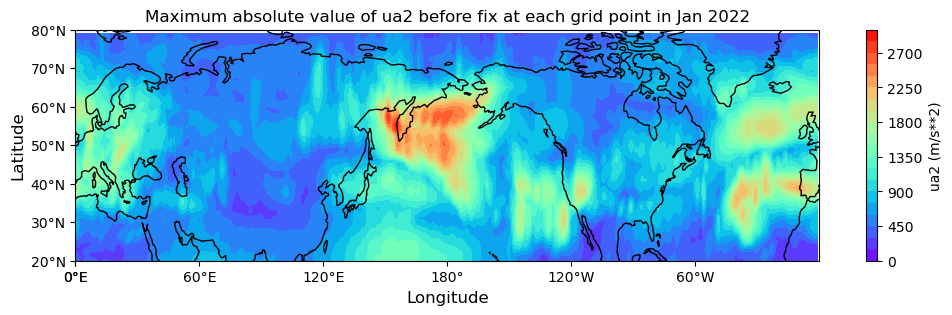

In [6]:
# Max abs value of ua2 before fix
max_ua2 = np.abs(before_fix_file['ua2'].values[:-4, 20:80, :]).max(axis=0)
    
plot_on_map(xlon, ylat[20:80], max_ua2, 'Maximum absolute value of ua2 before fix at each grid point in Jan 2022')

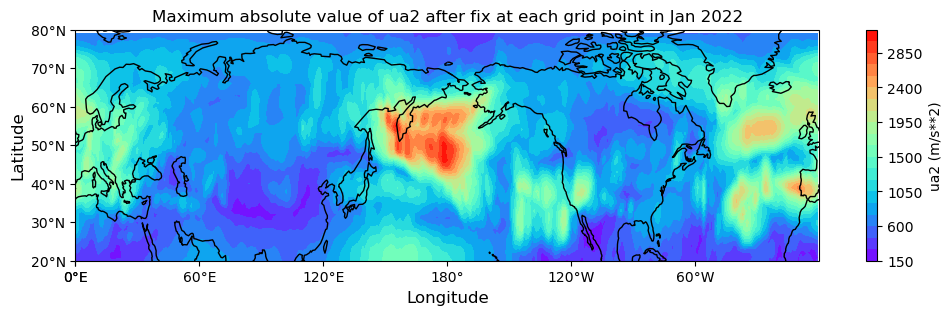

In [7]:
# Max abs value of ua2 after fix
max_ua2 = np.abs(after_fix_file['ua2'].values[:-4, 20:80, :]).max(axis=0)

plot_on_map(xlon, ylat[20:80], max_ua2, 'Maximum absolute value of ua2 after fix at each grid point in Jan 2022')

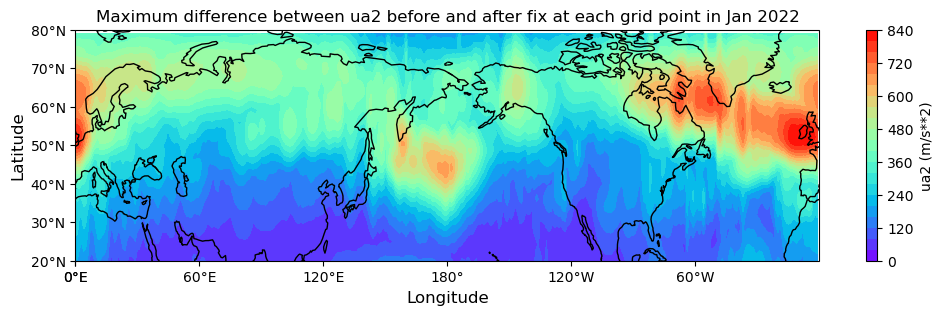

In [8]:
# Absolute difference throughout the period
abs_diff = np.abs(after_fix_file['ua2'].values[:-4, 20:80, :] - before_fix_file['ua2'].values[:-4, 20:80, :])
max_diff = abs_diff.max(axis=0)

plot_on_map(xlon, ylat[20:80], max_diff, 'Maximum difference between ua2 before and after fix at each grid point in Jan 2022')

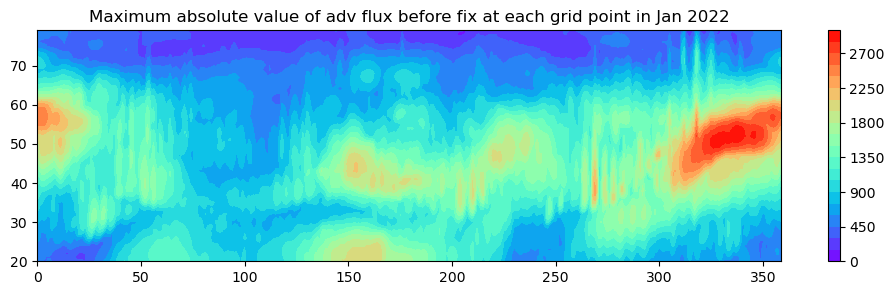

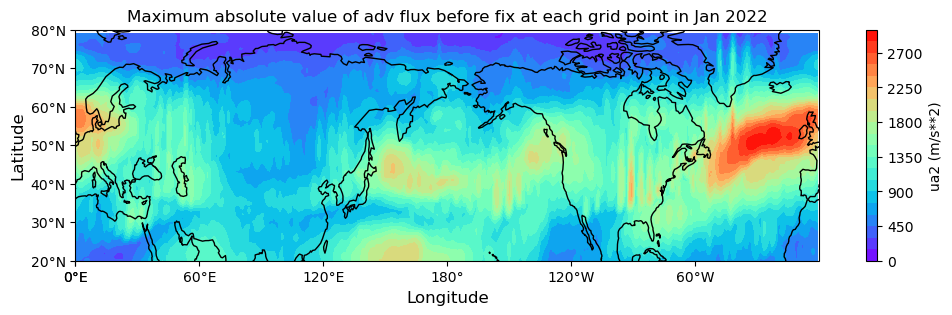

In [9]:
# Max abs value of adv flux (ua1+ua2+ep1) before fix
max_adv_flux = np.abs(
    before_fix_file['ua1'].values[:-4, 20:80, :]
    + before_fix_file['ua2'].values[:-4, 20:80, :]
    + before_fix_file['ep1'].values[:-4, 20:80, :]).max(axis=0)
plt.figure(figsize=(12,3))
plt.contourf(xlon, ylat[20:80], max_adv_flux, 20, cmap='rainbow')
plt.title('Maximum absolute value of adv flux before fix at each grid point in Jan 2022')
plt.colorbar()
    
plot_on_map(xlon, ylat[20:80], max_adv_flux, 'Maximum absolute value of adv flux before fix at each grid point in Jan 2022')

# Abs. difference between advective flux before and after `ua2` fix

cmin = -701.3671875, cmax = 1755.1043701171875


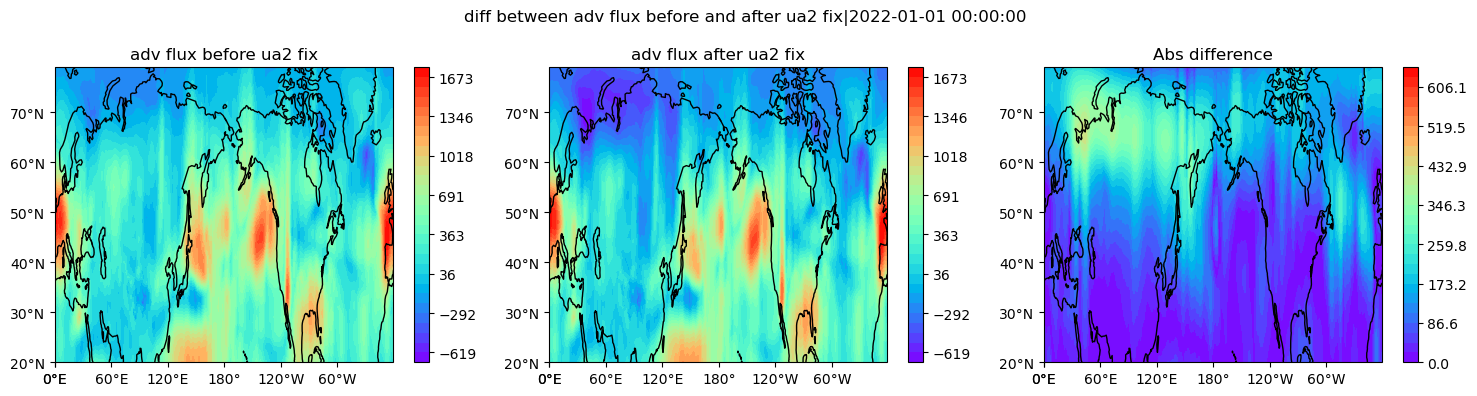






cmin = -775.270751953125, cmax = 1734.017333984375


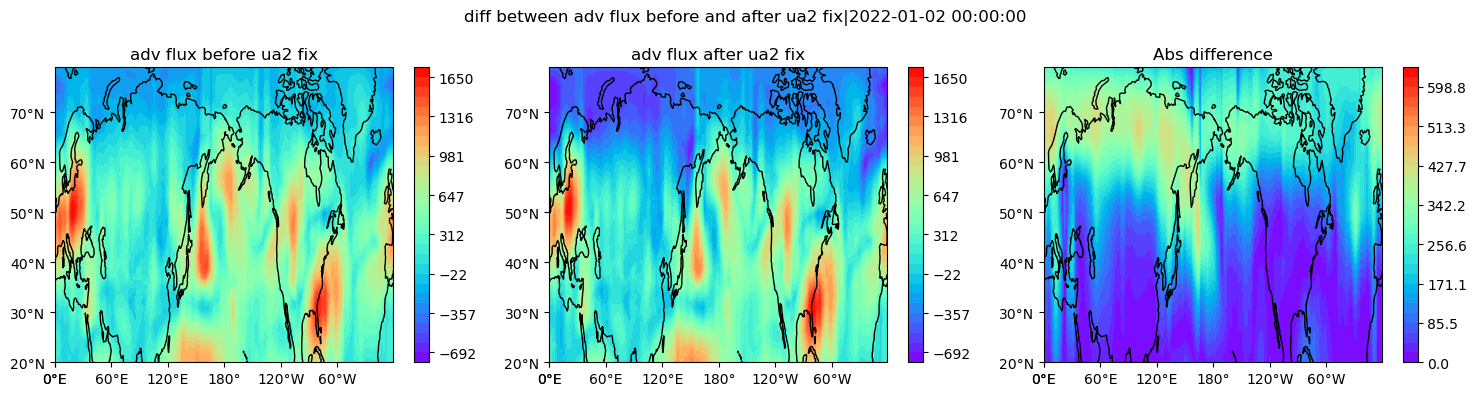






cmin = -1289.0023193359375, cmax = 2274.9501953125


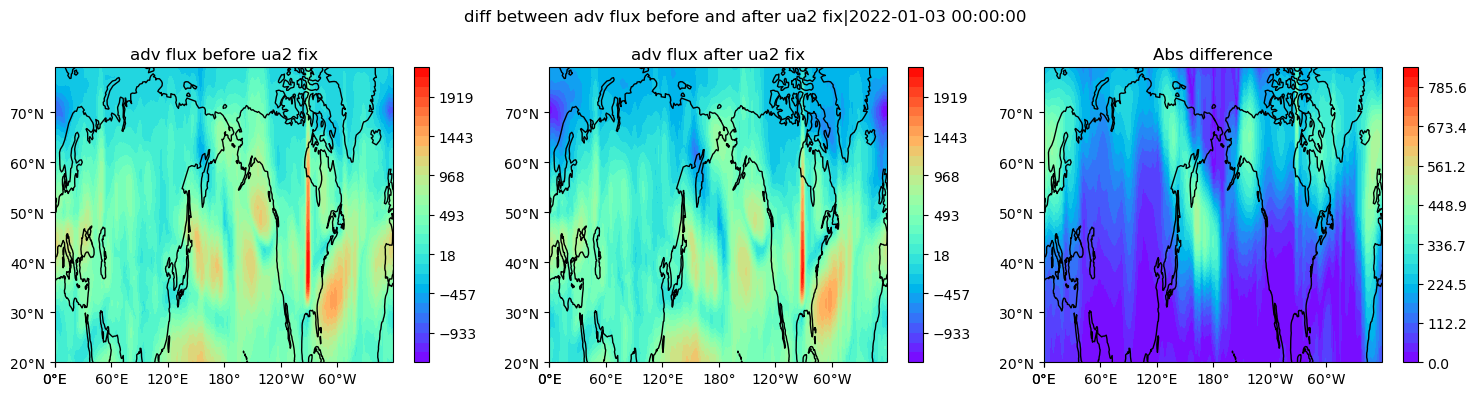






cmin = -954.5120239257812, cmax = 1722.1226806640625


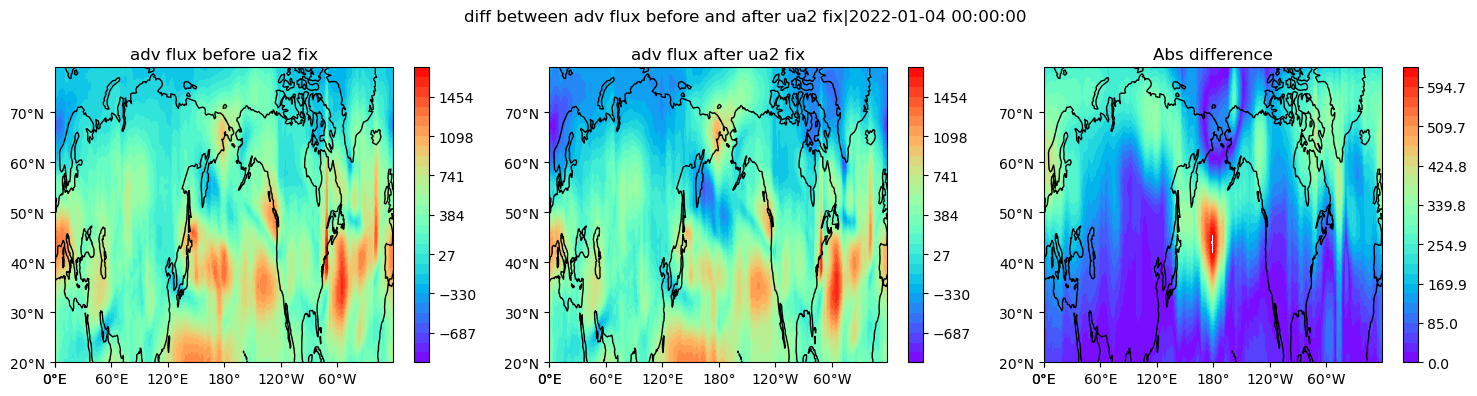






cmin = -1208.333984375, cmax = 2402.38623046875


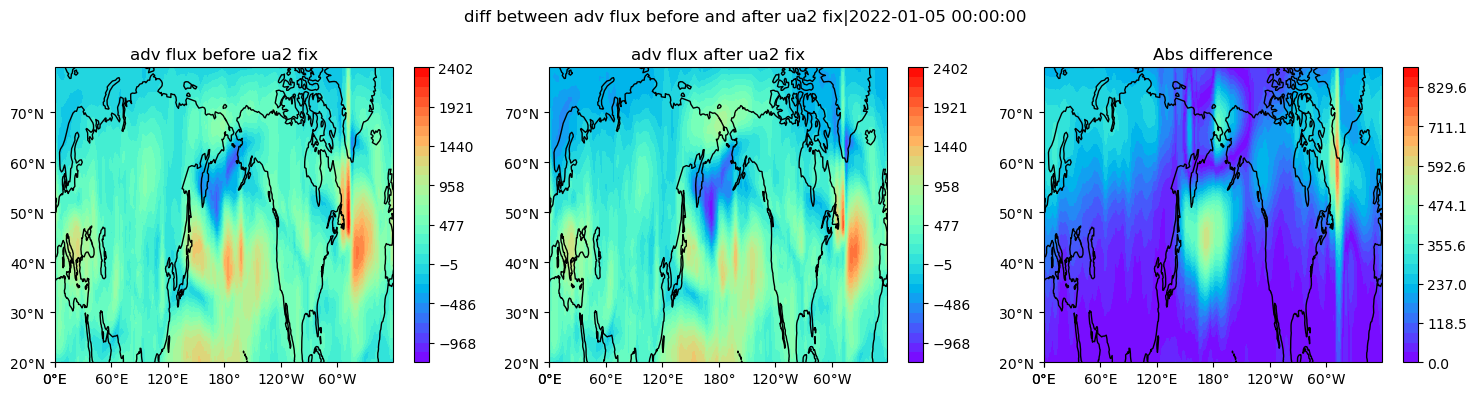






cmin = -995.9125366210938, cmax = 1874.2171630859375


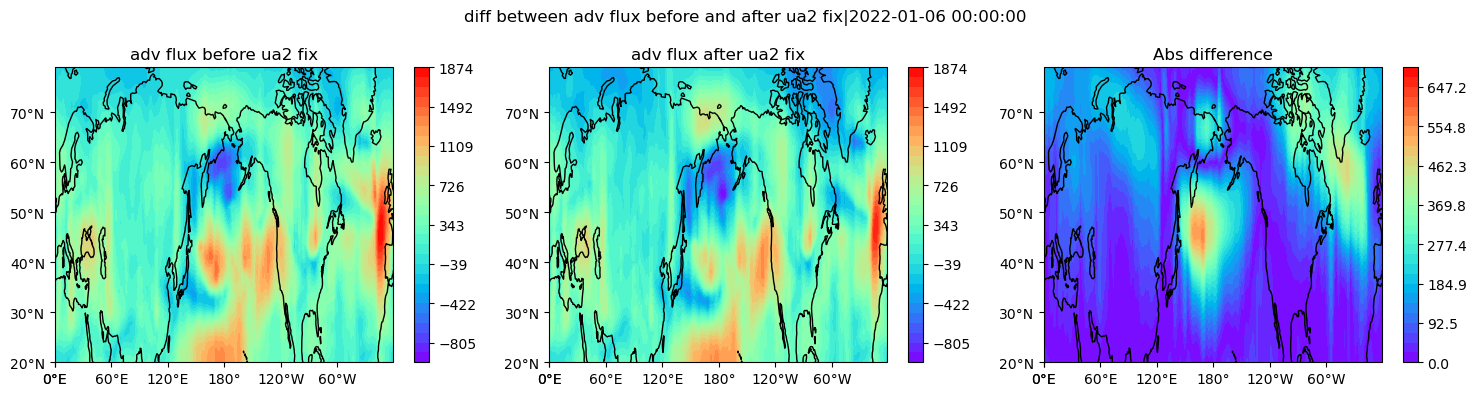






cmin = -978.60205078125, cmax = 1827.5843505859375


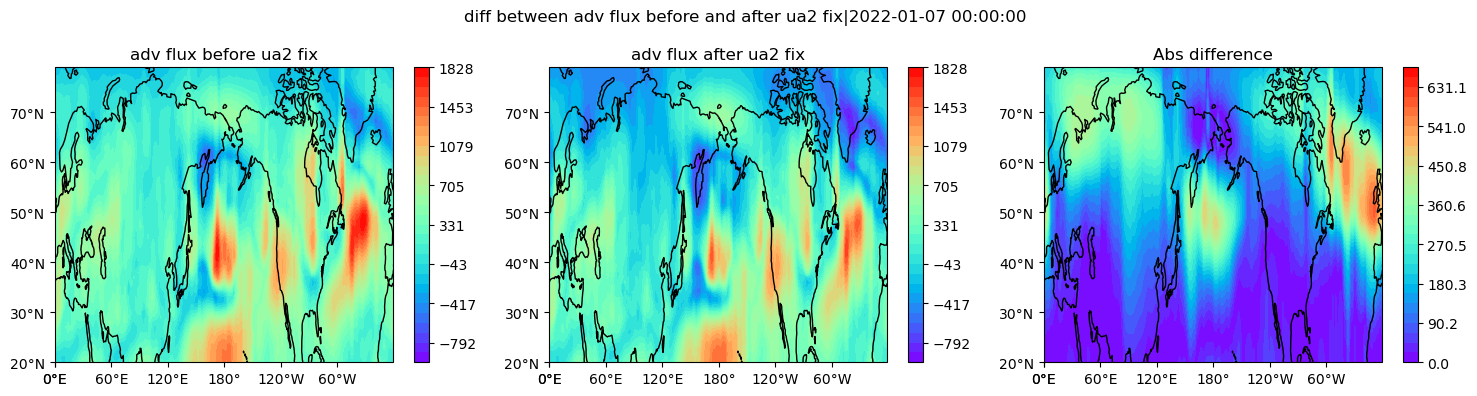






cmin = -1014.803955078125, cmax = 1701.3154296875


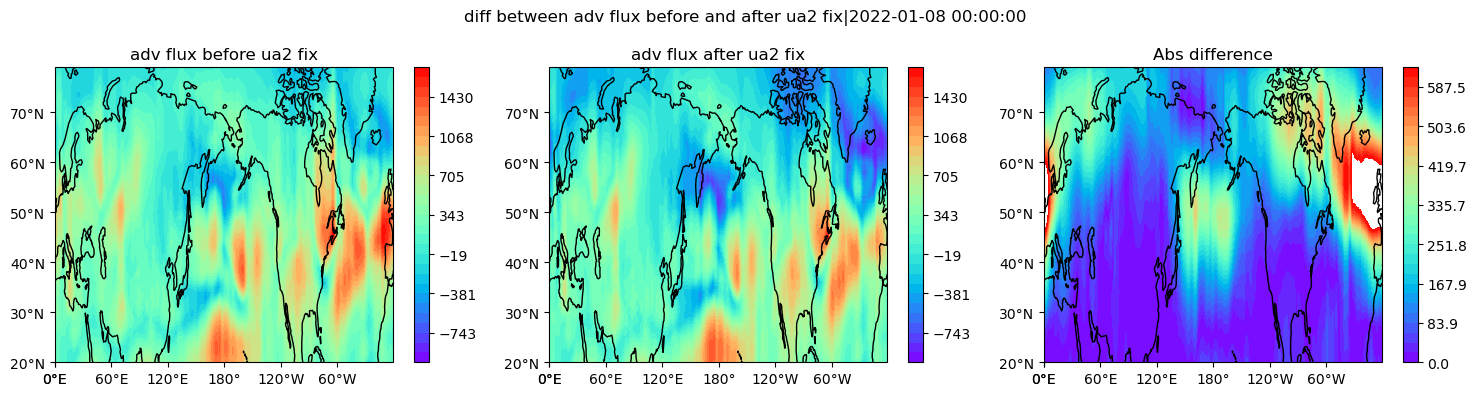






cmin = -844.109130859375, cmax = 2063.384521484375


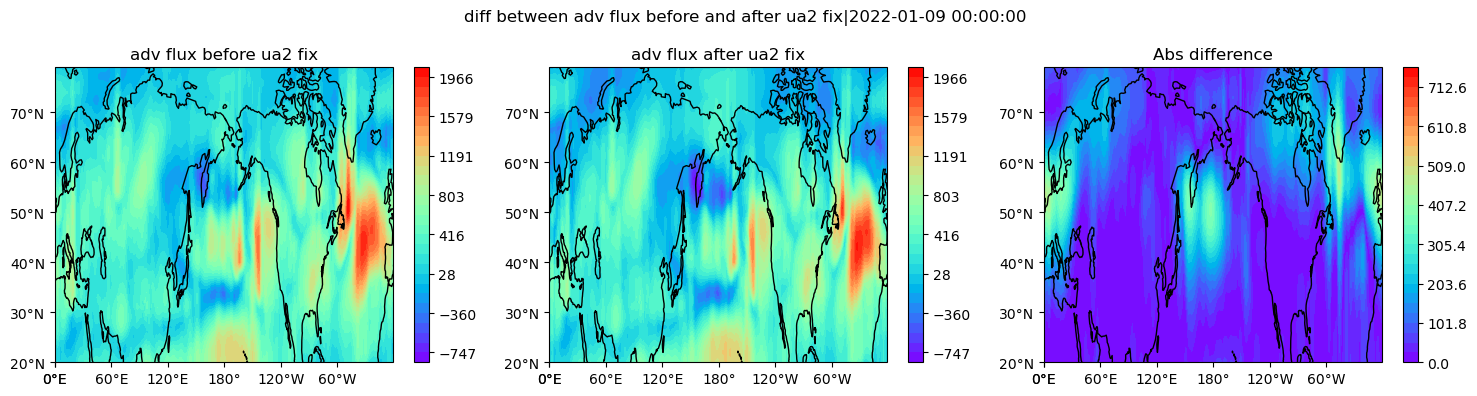






cmin = -1198.7645263671875, cmax = 1827.6090087890625


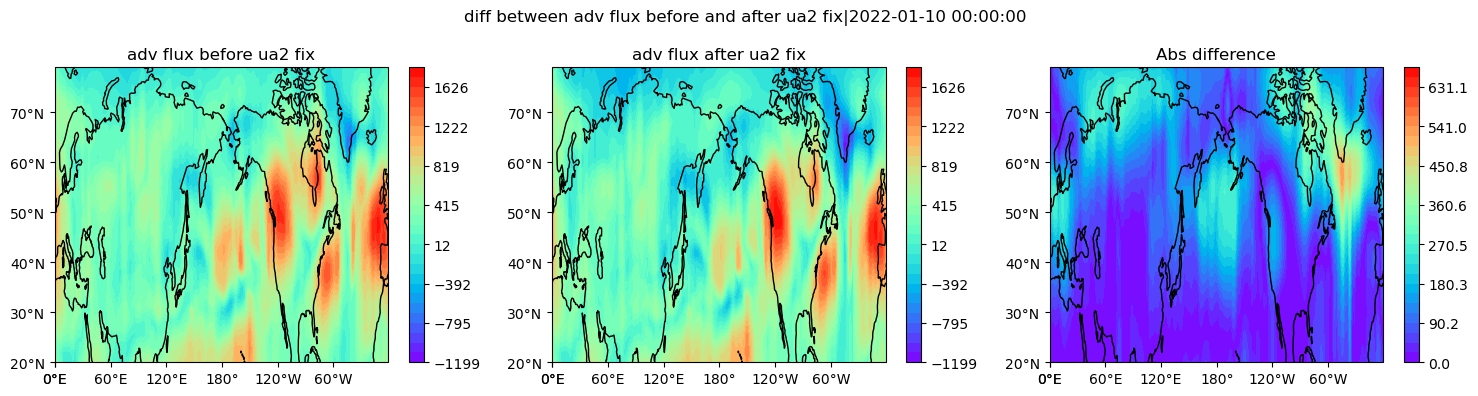






cmin = -722.061279296875, cmax = 1731.03173828125


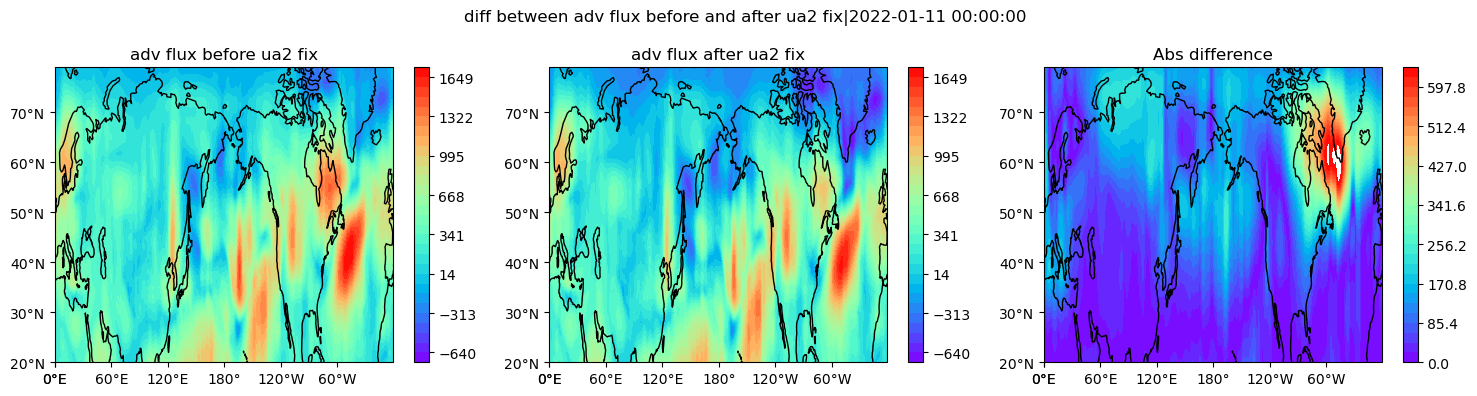






cmin = -773.2092895507812, cmax = 2269.528564453125


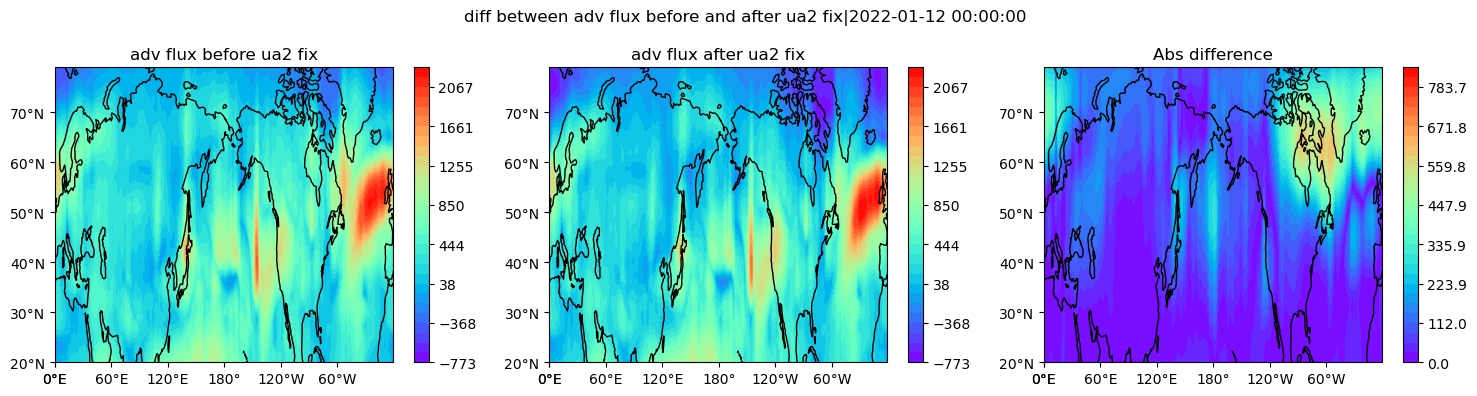






cmin = -646.04052734375, cmax = 3035.414306640625


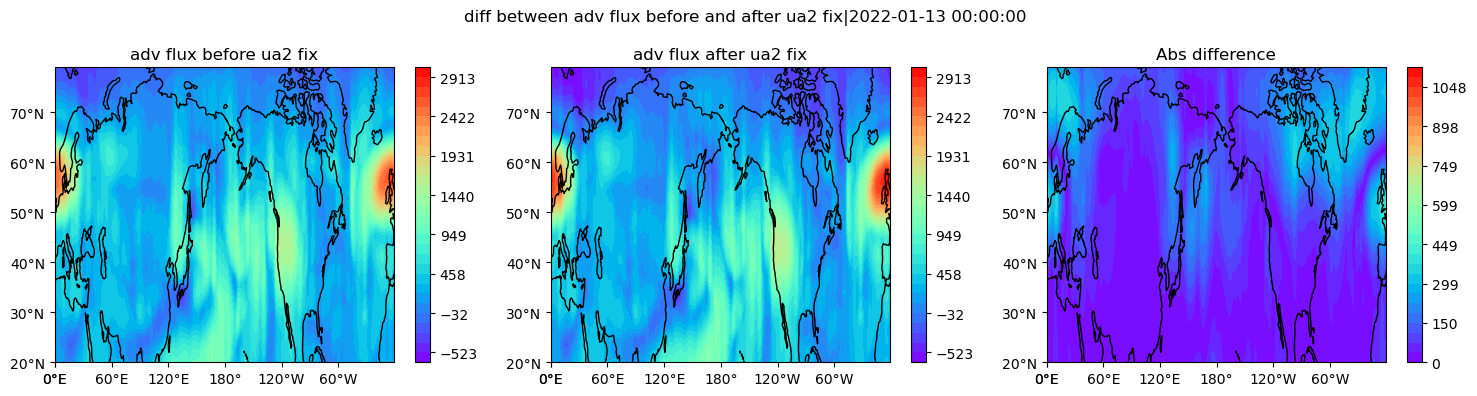






cmin = -542.5770263671875, cmax = 1996.1016845703125


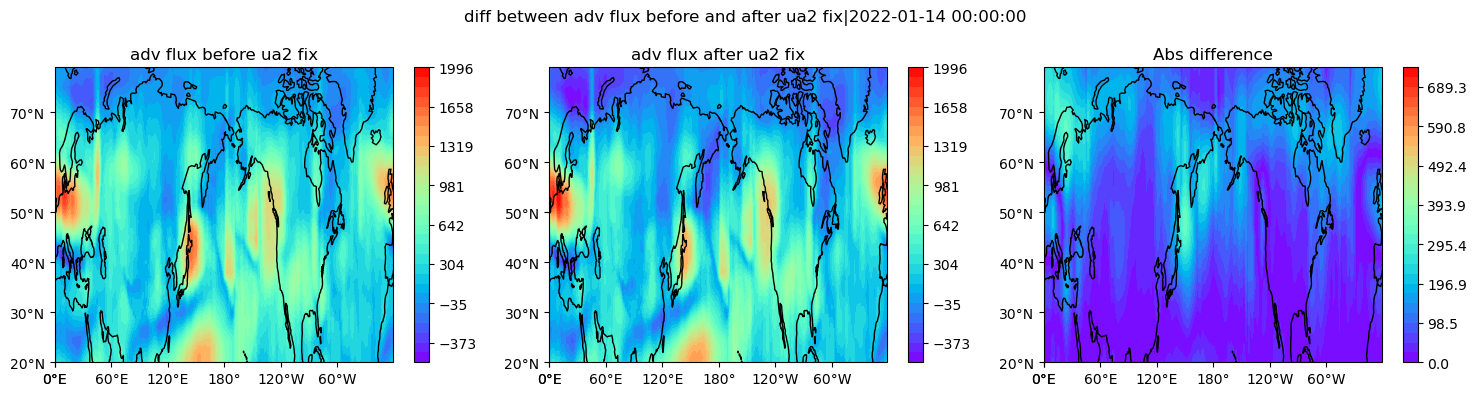






cmin = -582.6857299804688, cmax = 1703.431396484375


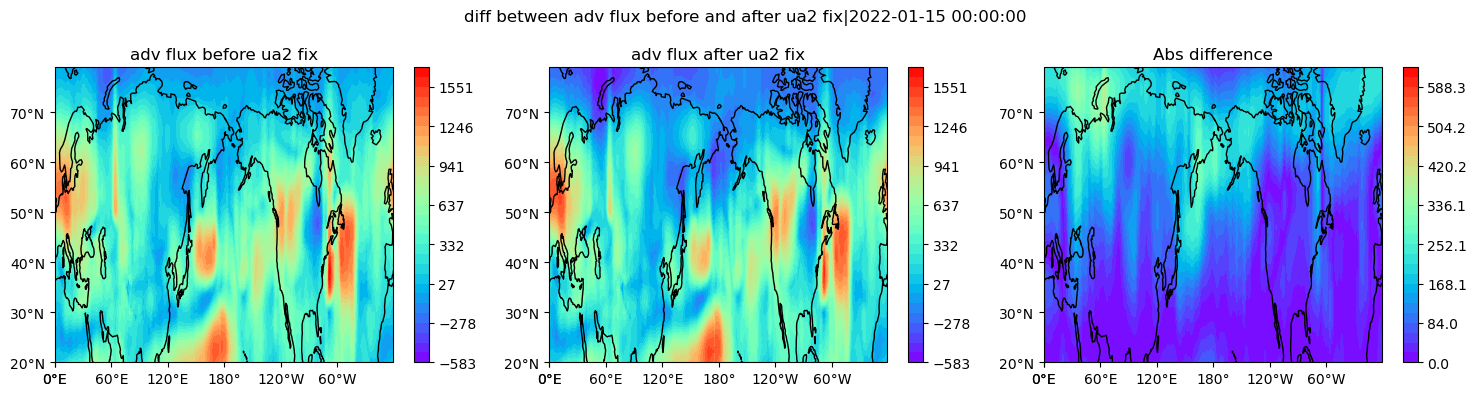






cmin = -585.3696899414062, cmax = 2166.72119140625


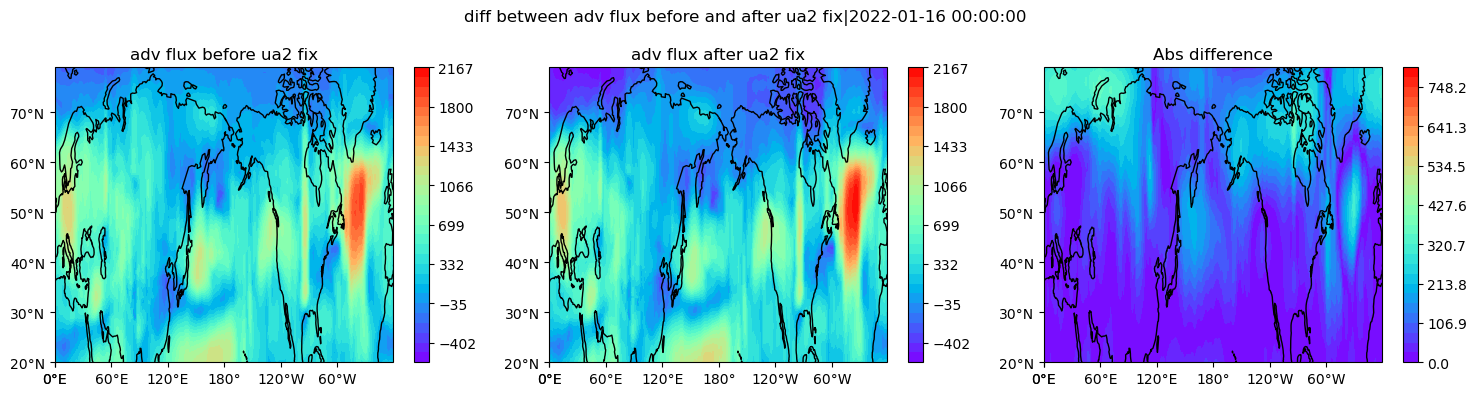






cmin = -505.37060546875, cmax = 2561.653076171875


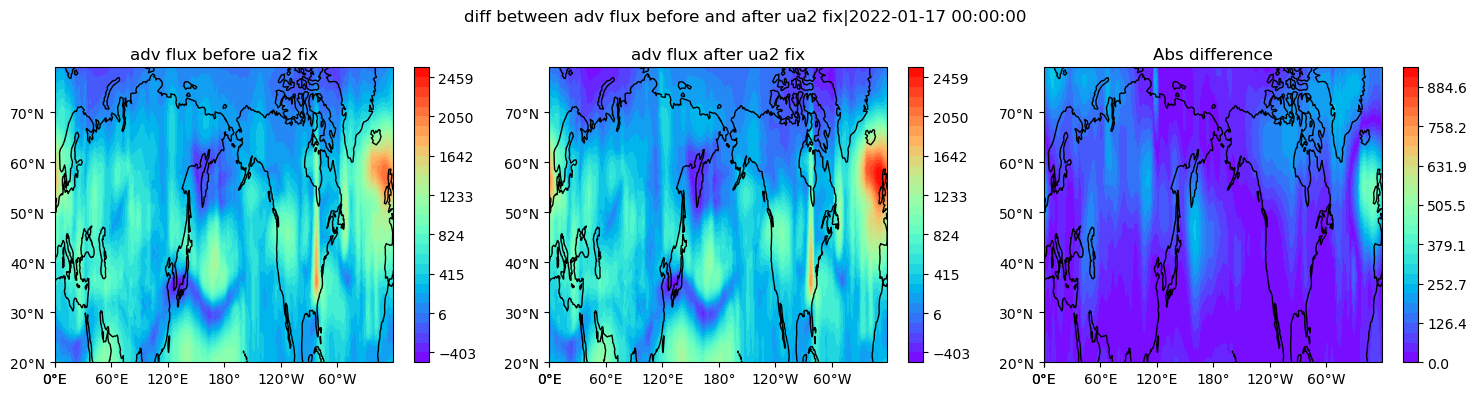






cmin = -506.579833984375, cmax = 2122.311279296875


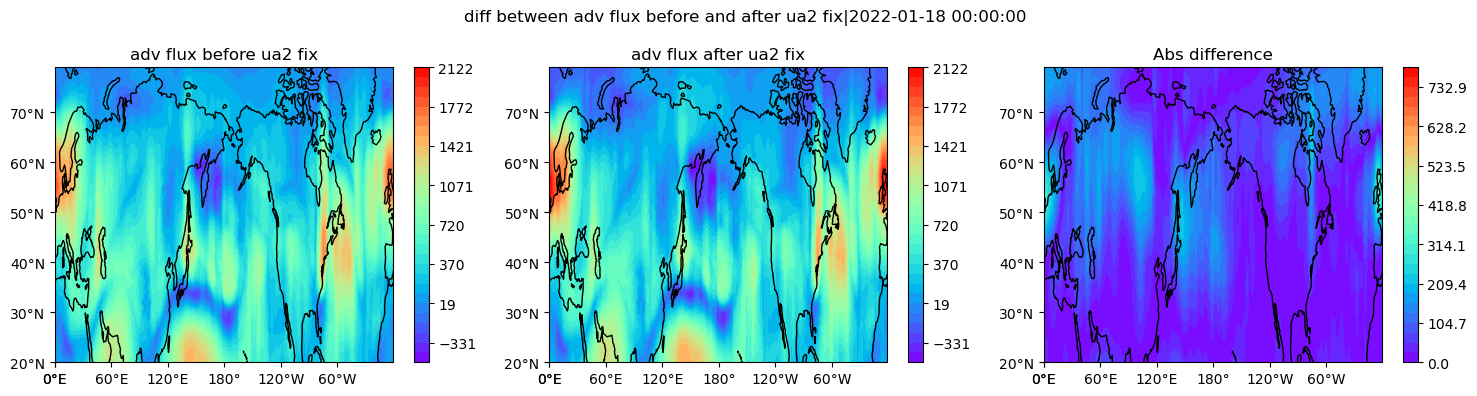






cmin = -540.8924560546875, cmax = 1907.8582763671875


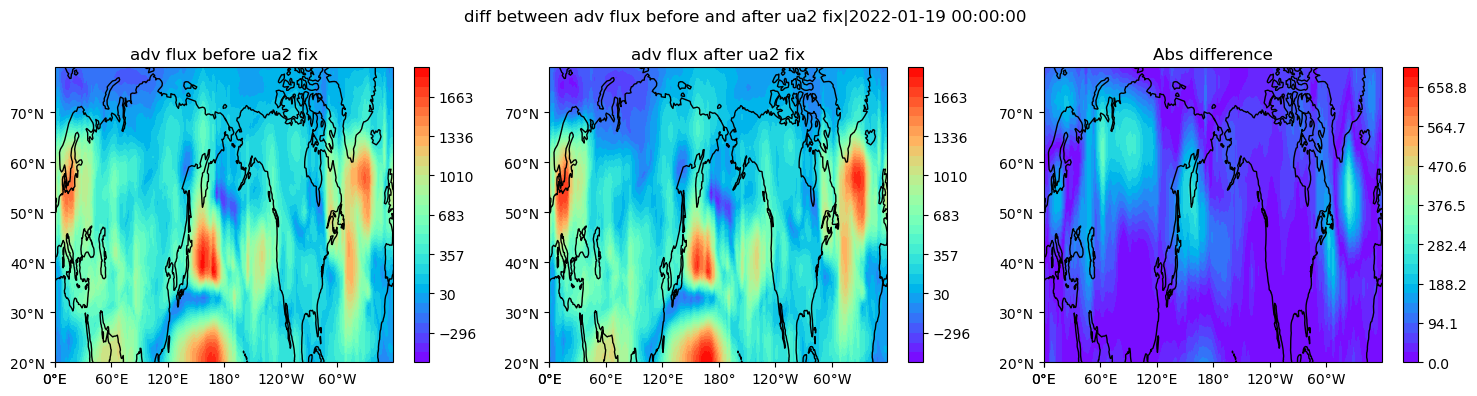






cmin = -833.9437866210938, cmax = 2007.9200439453125


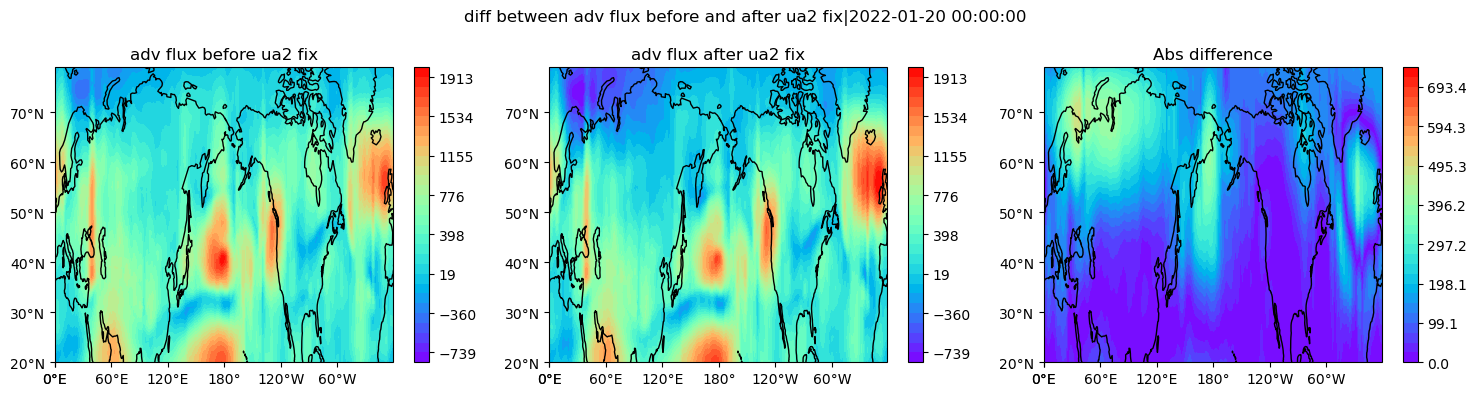






cmin = -439.92681884765625, cmax = 2174.778564453125


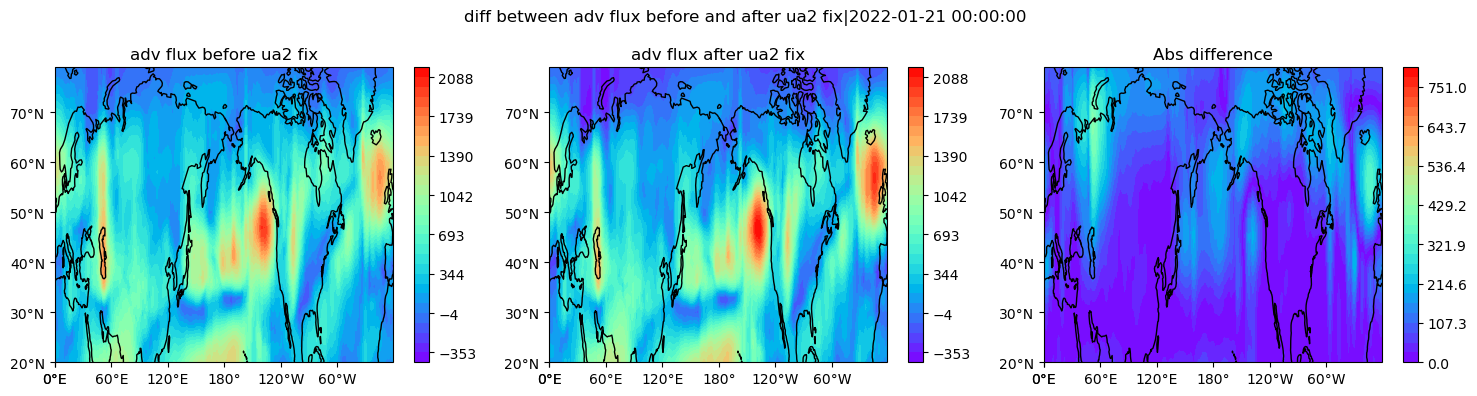






cmin = -607.301025390625, cmax = 2144.9130859375


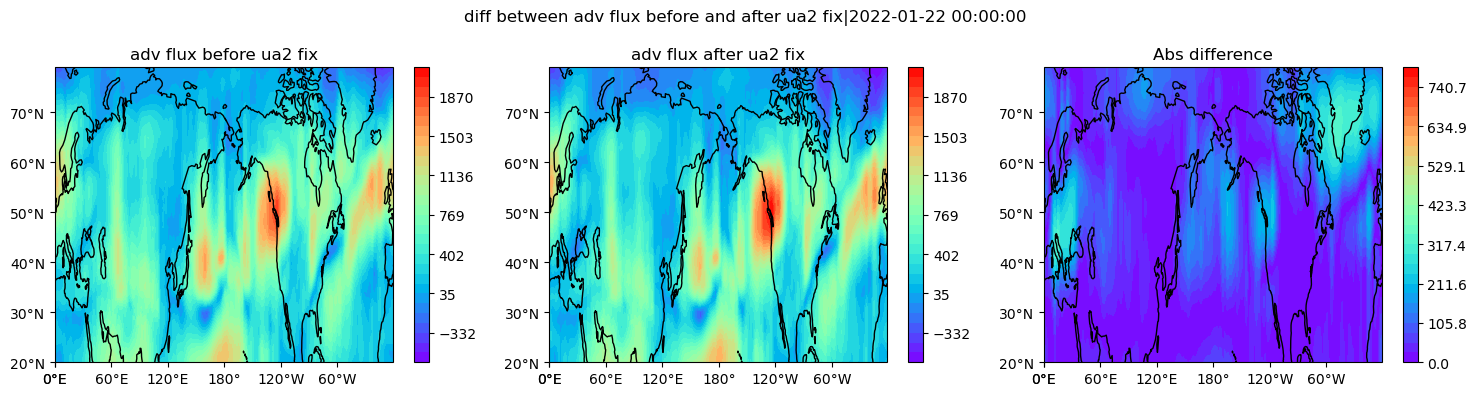






cmin = -577.1254272460938, cmax = 2091.885986328125


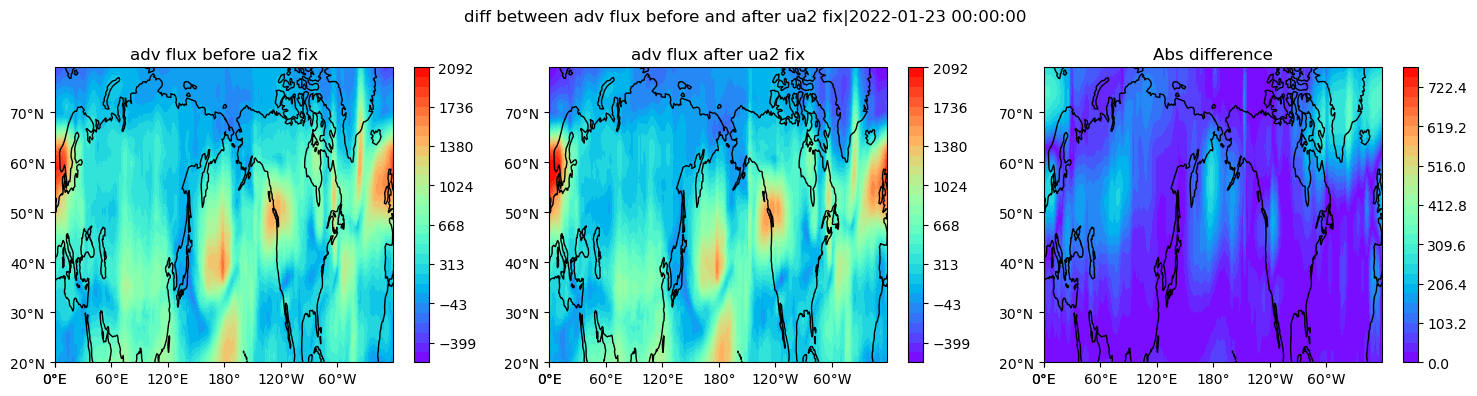






cmin = -547.533447265625, cmax = 1482.5413818359375


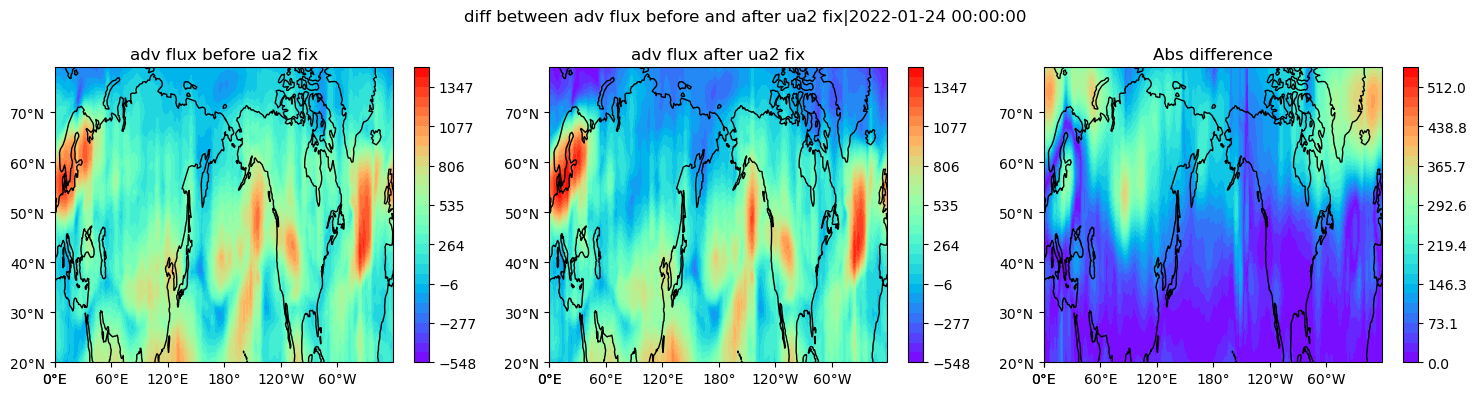






cmin = -591.626220703125, cmax = 1482.0240478515625


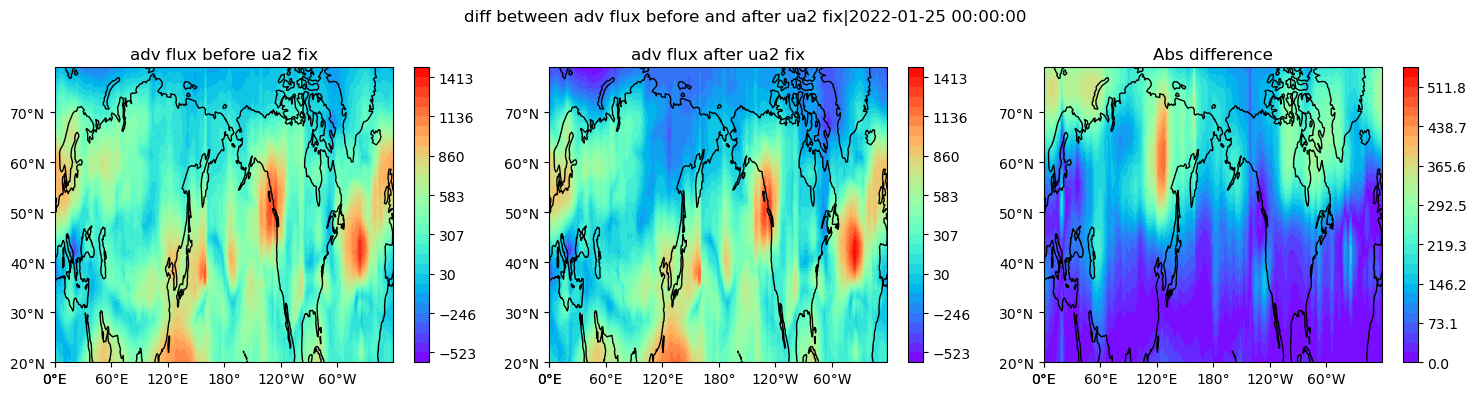






cmin = -448.72430419921875, cmax = 1798.036865234375


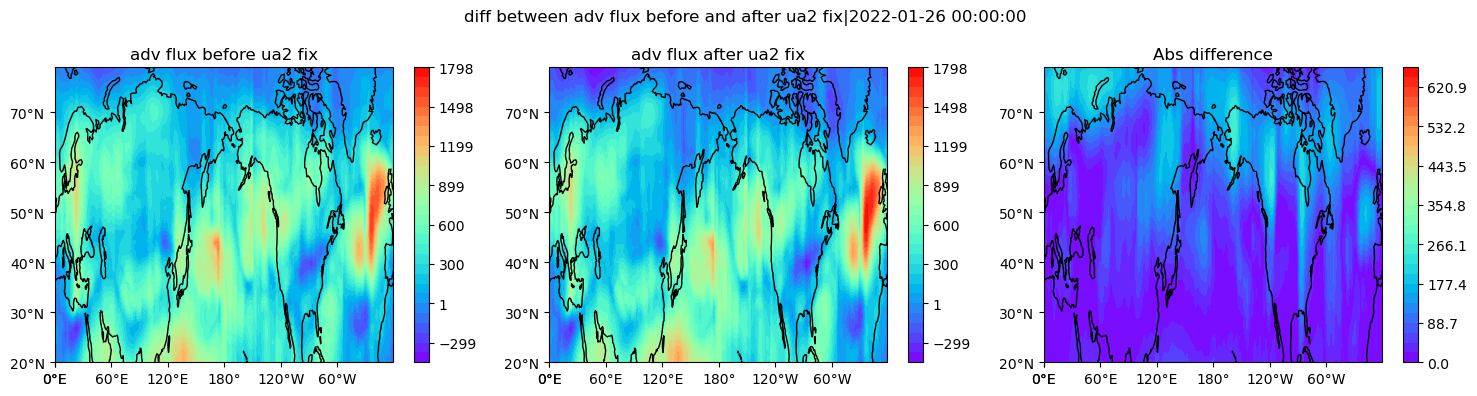

In [17]:
# Sample a few timesteps of difference
xlon = np.arange(0, 360)
ylat = np.arange(0, 91)
for tstep in np.arange(0, 101, 4):
    field_a = before_fix_file.isel(time=tstep)['ua1'].values[20:80, :]+before_fix_file.isel(time=tstep)['ua2'].values[20:80, :]+before_fix_file.isel(time=tstep)['ep1'].values[20:80, :]
    field_b = after_fix_file.isel(time=tstep)['ua1'].values[20:80, :]+after_fix_file.isel(time=tstep)['ua2'].values[20:80, :]+after_fix_file.isel(time=tstep)['ep1'].values[20:80, :]
    compare_two_fields_on_map(
        field_a=field_a,
        field_b=field_b,
        a_title='adv flux before ua2 fix', 
        b_title='adv flux after ua2 fix',
        x_coord=xlon, 
        y_coord=ylat[20:80],
        title=f'diff between adv flux before and after ua2 fix|{tstamps[tstep]}',
        diff_factor=0.37)    
    print("\n\n\n\n")
